In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import statistics
import datetime

In [2]:
city_data_path = os.path.join('Resources','city_data.csv')
ride_data_path = os.path.join('Resources','ride_data.csv')

In [3]:
city_data_df = pd.read_csv(city_data_path)
ride_data_df = pd.read_csv(ride_data_path)

In [4]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [5]:
ride_data_df.tail()

,city,date,fare,ride_id
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298


In [6]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
city_data_df.tail()

,city,driver_count,type
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural
119,South Saramouth,7,Rural


In [8]:
ride_data_df.notnull().sum()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
city_data_df.notnull().sum()

city            120
driver_count    120
type            120
dtype: int64

In [10]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
city_data_df[city_data_df['type'] == 'Urban'].count()

city            66
driver_count    66
type            66
dtype: int64

In [12]:
city_data_df[city_data_df['type'] == 'Suburban'].count()

city            36
driver_count    36
type            36
dtype: int64

In [13]:
city_data_df[city_data_df['type'] == 'Rural'].count()

city            18
driver_count    18
type            18
dtype: int64

In [14]:
ride_data_df.notnull().sum()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
len(ride_data_df['city'].unique())

120

In [16]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
city_ride_df = pd.merge(ride_data_df, city_data_df, on='city', how='left')
city_ride_df.tail()

,city,date,fare,ride_id,driver_count,type
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


In [28]:
# Create the Urban city DataFrame
urban_cities_df=city_ride_df[city_ride_df['type'] == 'Urban']
suburban_cities_df=city_ride_df[city_ride_df['type'] == 'Suburban']
rural_cities_df=city_ride_df[city_ride_df['type'] == 'Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [32]:
urban_ride_count = urban_cities_df.groupby(urban_cities_df['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [33]:
suburban_ride_count = suburban_cities_df.groupby(suburban_cities_df['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [34]:
rural_ride_count = rural_cities_df.groupby(rural_cities_df['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [48]:
urban_avg_fare = urban_cities_df.groupby(urban_cities_df['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [49]:
rural_avg_fare = rural_cities_df.groupby(rural_cities_df['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [50]:
suburban_avg_fare = suburban_cities_df.groupby(suburban_cities_df['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [41]:
urban_driver_count = urban_cities_df.groupby(urban_cities_df['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [42]:
suburban_driver_count = suburban_cities_df.groupby(suburban_cities_df['city']).mean()['driver_count']
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [43]:
rural_driver_count = rural_cities_df.groupby(rural_cities_df['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [46]:
urban_avg_fare.min()

'20.09'

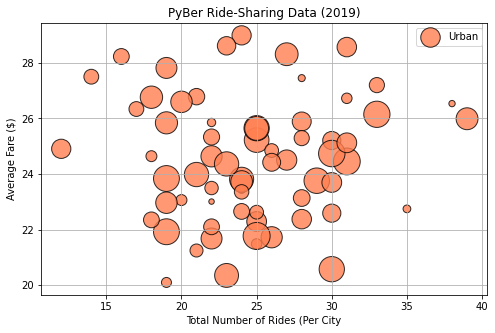

In [69]:
# plt.scatter(urban_ride_count, urban_avg_fare, s=[i*2 for i in urban_driver_count],color)
plt.figure(figsize=(8,5))
plt.scatter(urban_ride_count,
        urban_avg_fare, 
        s=10*urban_driver_count,
        c='coral', edgecolor='black',
        alpha=0.8, linewidths=1,
        label='Urban')
plt.legend()
plt.grid()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City')
plt.ylabel('Average Fare ($)')
# plt.yticks(np.arange(20,31,step=2))
plt.show()

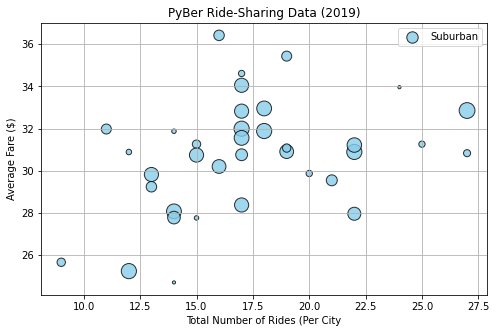

In [76]:
plt.figure(figsize=(8,5))
plt.scatter(suburban_ride_count,
        suburban_avg_fare, 
        s=10*suburban_driver_count,
        c='skyblue', edgecolor='black',
        alpha=0.8, linewidths=1,
        label='Suburban')
plt.legend()
plt.grid()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City')
plt.ylabel('Average Fare ($)')
plt.show()

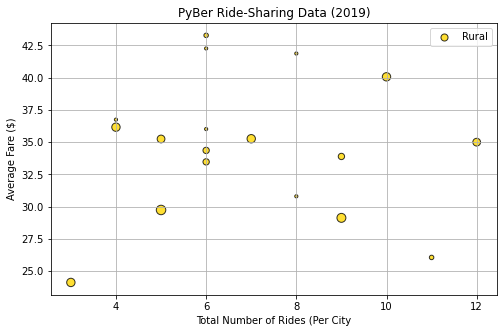

In [77]:
plt.figure(figsize=(8,5))
plt.scatter(rural_ride_count,
        rural_avg_fare, 
        s=10*rural_driver_count,
        c='gold', edgecolor='black',
        alpha=0.8, linewidths=1,
        label='Rural')
plt.legend()
plt.grid()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City')
plt.ylabel('Average Fare ($)')
plt.show()

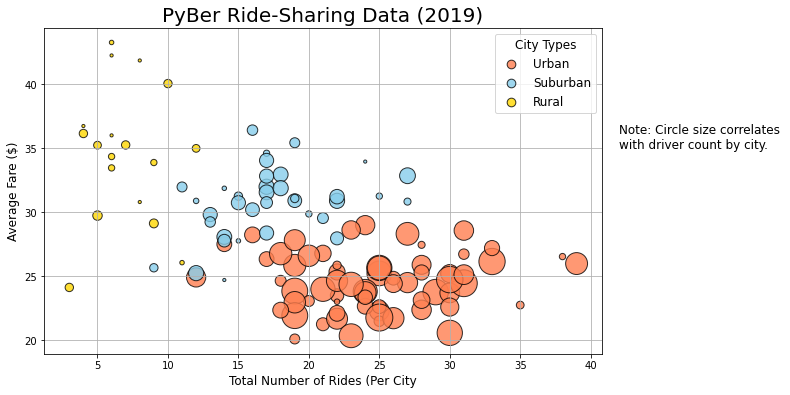

<Figure size 432x288 with 0 Axes>

In [92]:
plt.figure(figsize=(10,6))
plt.scatter(urban_ride_count,
        urban_avg_fare, 
        s=10*urban_driver_count,
        c='coral', edgecolor='black',
        alpha=0.8, linewidths=1,
        label='Urban')

plt.scatter(suburban_ride_count,
        suburban_avg_fare, 
        s=10*suburban_driver_count,
        c='skyblue', edgecolor='black',
        alpha=0.8, linewidths=1,
        label='Suburban')

plt.scatter(rural_ride_count,
        rural_avg_fare, 
        s=10*rural_driver_count,
        c='gold', edgecolor='black',
        alpha=0.8, linewidths=1,
        label='Rural')

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35,'Note: Circle size correlates \nwith driver count by city.', fontsize=12)
plt.grid()
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.show()
plt.savefig('analysis\Fig1.png')